# Logistic Regression with Python

<a id="ref1"></a>
## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">


The objective of the __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.


In [31]:
import pandas as pd 
import pylab as pl 
import numpy as np 
import scipy.optimize as opt 
from sklearn import preprocessing
%matplotlib inline
import matplotlib as plt


<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

To download the data, we will use `!wget` to download it from IBM Object Storage.


In [32]:
df = pd.read_csv(r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\Ml_project_IBM\ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<h2 id="preprocessing">Data pre-processing and selection</h2>


In [33]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Practice
How many rows and columns are in this dataset in total? What are the names of columns?


In [34]:
df.shape

(200, 10)

In [35]:
x = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [36]:
y = np.asarray(df[['churn']])
y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

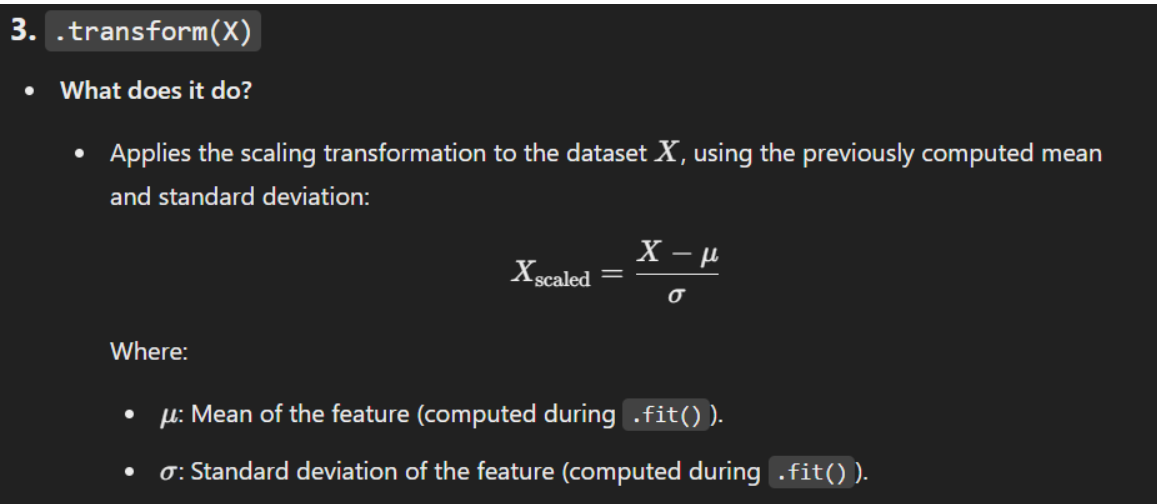

In [37]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)  #preprocessing.StandardScaler Used to scale features to have a mean of 0 and a standard deviation of 1.
x[0:5] # fit(X) Computes the mean and standard deviation dataset x ,transform  Applies the scaling transformation to the dataset X


array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86,  0.65,  1.56],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86, -1.55, -0.64],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86, -1.55, -0.64],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16,  0.65,  1.56],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86,  0.65, -0.64]])

## Train/Test dataset


In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=4)

print("Train set : " , xtrain.shape,ytrain.shape)
print("Test set : " , xtest.shape,ytest.shape)

Train set :  (160, 9) (160, 1)
Test set :  (40, 9) (40, 1)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>


Let's build our model using __LogisticRegression__ from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now let's fit our model with train set:


### C=0.01:
Regularization strength. Smaller values of C imply stronger regularization (to prevent overfitting).

### solver='liblinear':
Specifies the optimization algorithm used for training.
liblinear is a good choice for smaller datasets and binary classification tasks.
Other options include newton-cg, lbfgs, sag, and saga (better for larger datasets or multi-class problems).

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(xtrain,ytrain) #LogisticRegression predicting a binary outcome like 0/1, True/False
LR

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [40]:
ypre = LR.predict(xtest)
ypre

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):


In [41]:
#This method computes the predicted probabilities of the target variable for each data point in the 
# test set X_test based on the trained logistic regression model LR

y_pre_prob = LR.predict_proba(xtest)
y_pre_prob

array([[0.59, 0.41],
       [0.57, 0.43],
       [0.53, 0.47],
       [0.67, 0.33],
       [0.53, 0.47],
       [0.6 , 0.4 ],
       [0.5 , 0.5 ],
       [0.57, 0.43],
       [0.4 , 0.6 ],
       [0.59, 0.41],
       [0.55, 0.45],
       [0.59, 0.41],
       [0.52, 0.48],
       [0.41, 0.59],
       [0.69, 0.31],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.46, 0.54],
       [0.47, 0.53],
       [0.57, 0.43],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.67, 0.33],
       [0.5 , 0.5 ],
       [0.48, 0.52],
       [0.73, 0.27],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.74, 0.26],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.41, 0.59],
       [0.74, 0.26],
       [0.64, 0.36],
       [0.6 , 0.4 ],
       [0.46, 0.54],
       [0.57, 0.43],
       [0.69, 0.31],
       [0.48, 0.52]])

<h2 id="evaluation">Evaluation</h2>


### jaccard index
Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


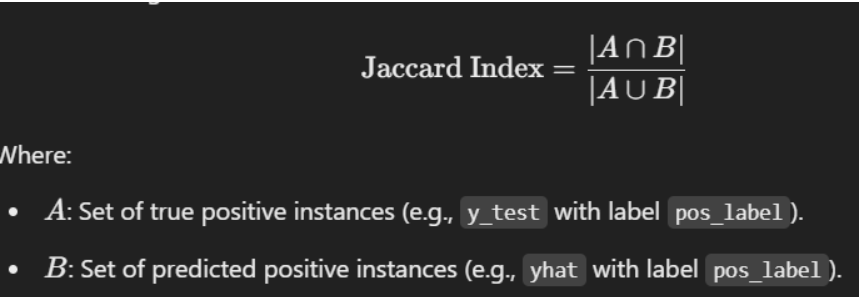

In [42]:
from sklearn.metrics import jaccard_score
jaccard_score(ytest,ypre,pos_label=0)

0.5625

### confusion matrix
Another way of looking at the accuracy of the classifier is to look at __confusion matrix__.


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(ytest, ypre, labels=[1,0]))

[[ 8  7]
 [ 7 18]]


Confusion matrix, without normalization
[[ 8  7]
 [ 7 18]]


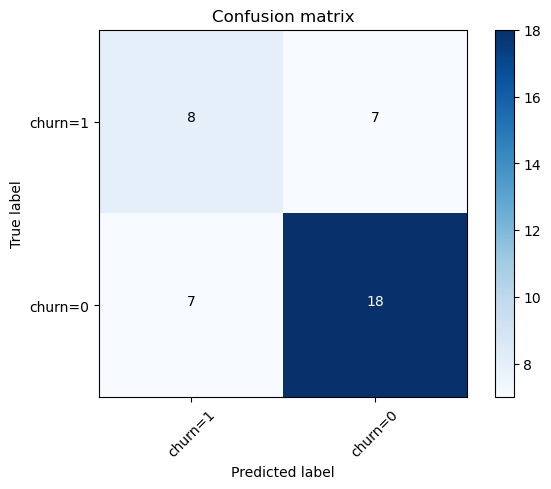

In [48]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assume ytest (true labels) and ypre (predicted labels) are defined
cnf_matrix = confusion_matrix(ytest, ypre, labels=[1, 0])

# Plot Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1', 'churn=0'], normalize=False, title='Confusion matrix')
plt.show()


In [51]:
print (classification_report(ytest, ypre))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



In [53]:
from sklearn.metrics import log_loss
log_loss(ytest, y_pre_prob)

0.6155809757244557